## Auto-mobile Price Prediction Model:
- code By "Shubham Mishra"

In [1]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing dataset
automobile = pd.read_csv('CarPrice_Assignment.csv')
automobile.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


#### Data Understanding Phase:

In [3]:
automobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

#### *Inference: Out of 26 columns- 7 are Int, 10 are Object and 8 are Float type*

In [4]:
automobile.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


#### *Inference: Data so far seems nice, Numerical data seems to be distributed properly.*

In [5]:
automobile.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [6]:
len(automobile['car_ID'].unique().tolist())

205

#### *inference: Data does not have any nulls.*

### Data Visualization:

<Figure size 720x576 with 0 Axes>

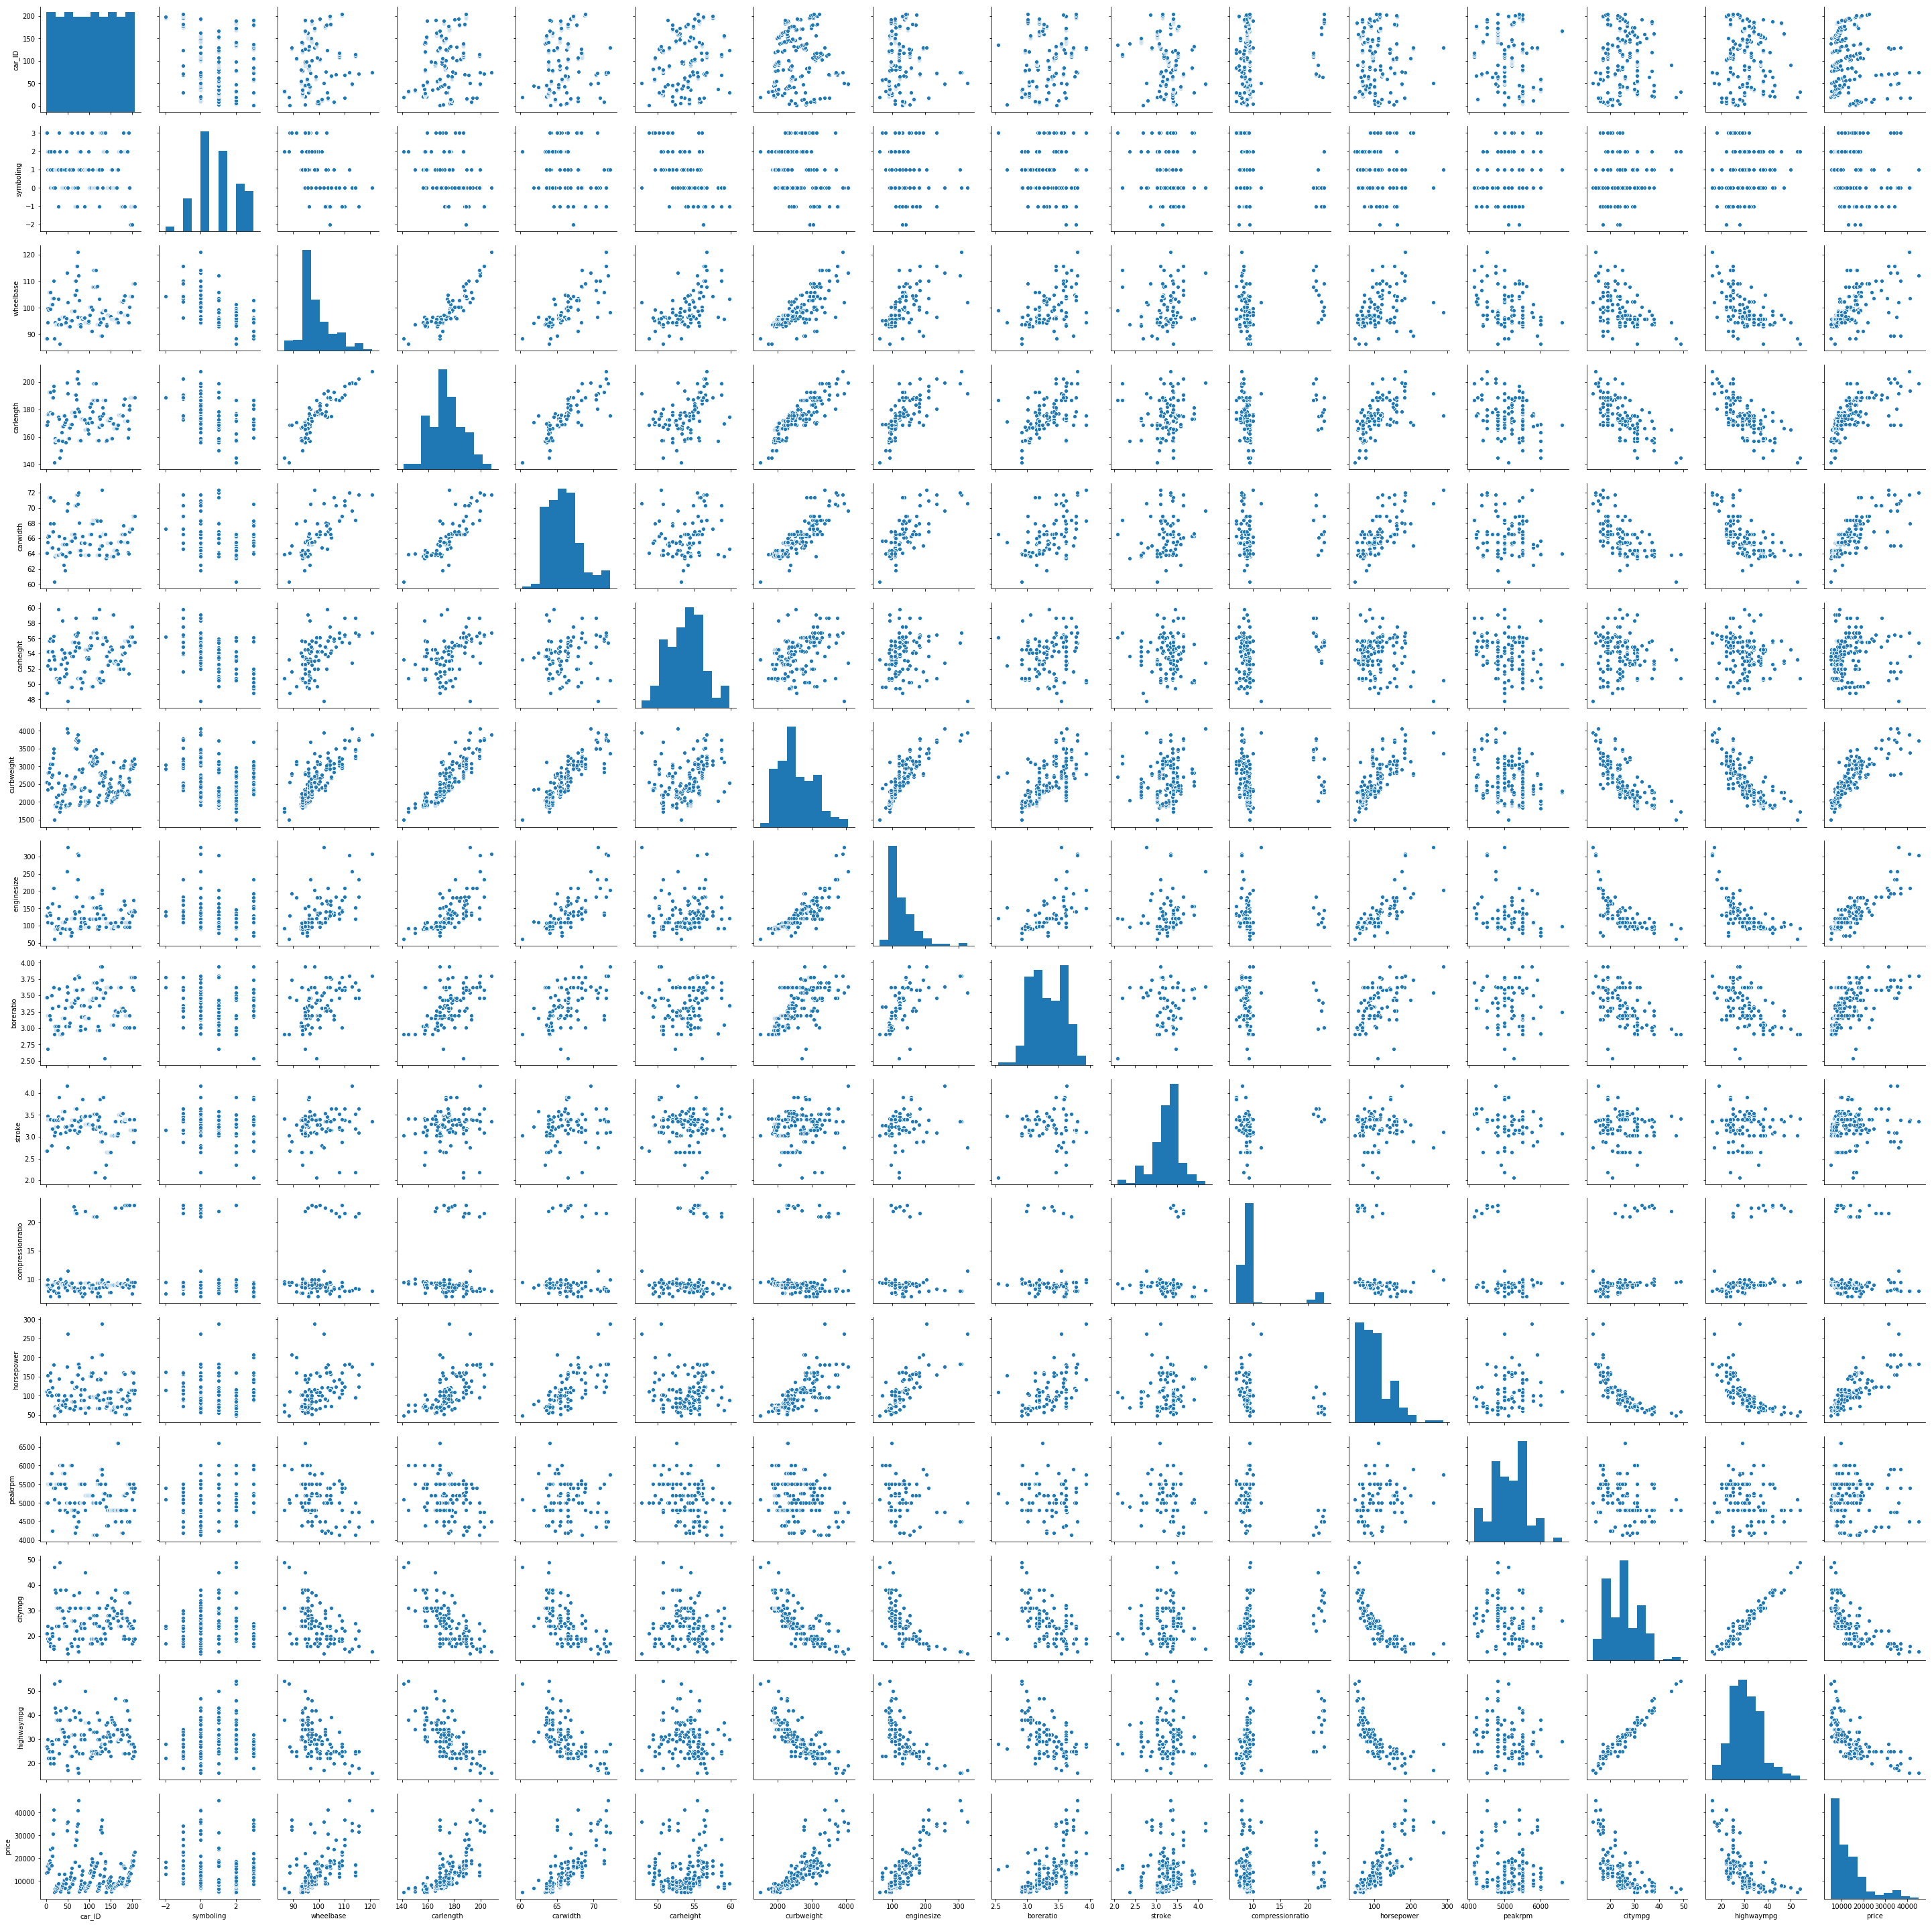

In [7]:
#Scatter plot: For Numerical Correlations
plt.figure(figsize=(10,8))
sns.pairplot(data = automobile)

#### *Inference: Since this plot is telling me that there is huge amount of multi-collinearity in the Dataset, we will create heatmap and correlation matrix to get proper insights*

In [8]:
automobile = automobile.drop(columns = ['car_ID'], axis = 1)
#Removed car_ID as it is not relevant to draw any conclusion.

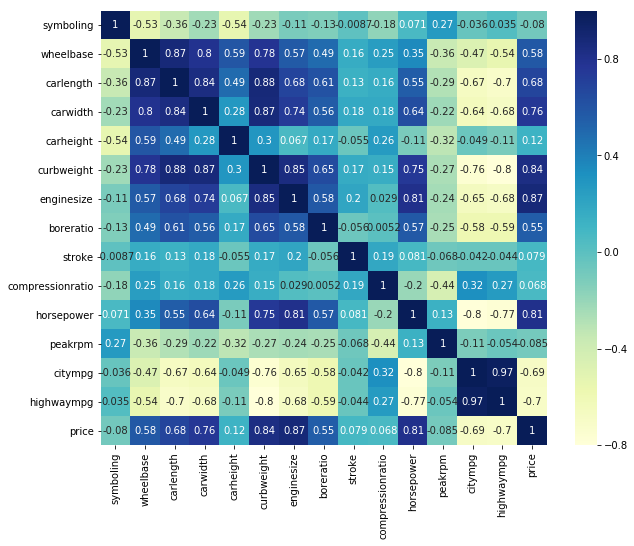

In [9]:
#Creating heatmap 
plt.figure(figsize=(10,8))
sns.heatmap(automobile.corr(),annot=True, cmap='YlGnBu')

#### *Inference: So this heatmap has given us a better picture like wheelbase, carlength, carwidth, curbweight, enginesize, boreratio, horsepower are correlated with price as well as among themselves too*
#### *And, also that there are cases of huge multicollinearity like citympg and highwaympg*

In [10]:
#Dropping highwaympg as it makes no sense due to its huge multicollinearity with citympg.
automobile = automobile.drop(columns = ['highwaympg'], axis = 1)
automobile.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,six,152,mpfi,2.68,3.47,9.0,154,5000,19,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,four,109,mpfi,3.19,3.40,10.0,102,5500,24,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,five,136,mpfi,3.19,3.40,8.0,115,5500,18,17450.0


### *Now Cleaning the Categorical Variables:*

In [11]:
#Since already told that we dont have to consider car model hence dropping it off.
automobile['CarName'] = automobile.CarName.str.split().str.get(0)
automobile['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [12]:
automobile.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,six,152,mpfi,2.68,3.47,9.0,154,5000,19,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,four,109,mpfi,3.19,3.40,10.0,102,5500,24,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,five,136,mpfi,3.19,3.40,8.0,115,5500,18,17450.0


In [13]:
# Getting some redundant data with spelling mistakes hence correcting them in filtered CarName.
automobile['CarName'] = automobile['CarName'].replace(['maxda'],'mazda')
automobile['CarName'] = automobile['CarName'].replace(['Nissan'],'nissan')
automobile['CarName'] = automobile['CarName'].replace(['porcshce'],'porsche')
automobile['CarName'] = automobile['CarName'].replace(['toyouta'],'toyota')
automobile['CarName'] = automobile['CarName'].replace(['vokswagen','vw'],'volkswagen')

In [14]:
auto_temp = automobile

In [15]:
auto_temp['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [16]:
#Applying binary encoding for 2 level classifiers fueltype,aspiration, enginelocation
auto_temp = automobile.replace({'fueltype': {'gas':0,'diesel':1}})
auto_temp = auto_temp.replace({'aspiration': {'std':0,'turbo':1}})
auto_temp = auto_temp.replace({'enginelocation': {'front':0,'rear':1}})
auto_temp.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price
0,3,alfa-romero,0,0,two,convertible,rwd,0,88.6,168.8,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,13495.0
1,3,alfa-romero,0,0,two,convertible,rwd,0,88.6,168.8,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,16500.0
2,1,alfa-romero,0,0,two,hatchback,rwd,0,94.5,171.2,...,six,152,mpfi,2.68,3.47,9.0,154,5000,19,16500.0
3,2,audi,0,0,four,sedan,fwd,0,99.8,176.6,...,four,109,mpfi,3.19,3.40,10.0,102,5500,24,13950.0
4,2,audi,0,0,four,sedan,4wd,0,99.4,176.6,...,five,136,mpfi,3.19,3.40,8.0,115,5500,18,17450.0


In [17]:
auto_temp.shape

(205, 24)

In [18]:
auto_temp.shape

(205, 24)

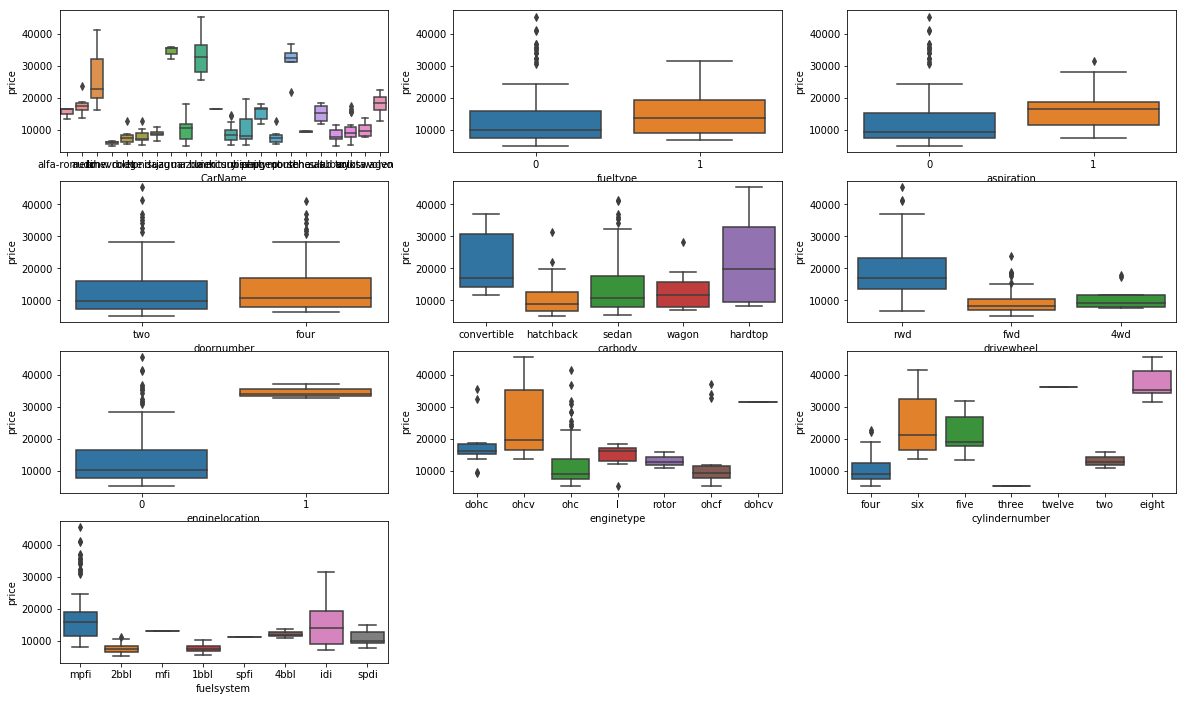

In [19]:
#Now Visualizing these categorical variables
plt.figure(figsize=(20, 12))
plt.subplot(4,3,1)
sns.boxplot(x = 'CarName', y = 'price', data = auto_temp)
plt.subplot(4,3,2)
sns.boxplot(x = 'fueltype', y = 'price', data = auto_temp)
plt.subplot(4,3,3)
sns.boxplot(x = 'aspiration', y = 'price', data = auto_temp)
plt.subplot(4,3,4)
sns.boxplot(x = 'doornumber', y = 'price', data = auto_temp)
plt.subplot(4,3,5)
sns.boxplot(x = 'carbody', y = 'price', data = auto_temp)
plt.subplot(4,3,6)
sns.boxplot(x = 'drivewheel', y = 'price', data = auto_temp)
plt.subplot(4,3,7)
sns.boxplot(x = 'enginelocation', y = 'price', data = auto_temp)
plt.subplot(4,3,8)
sns.boxplot(x = 'enginetype', y = 'price', data = auto_temp)
plt.subplot(4,3,9)
sns.boxplot(x = 'cylindernumber', y = 'price', data = auto_temp)
plt.subplot(4,3,10)
sns.boxplot(x = 'fuelsystem', y = 'price', data = auto_temp)
plt.show()

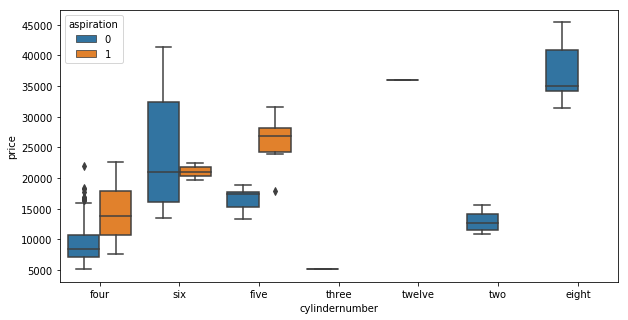

In [20]:
#Now checking Cylinder Number with aspiration
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'cylindernumber', y = 'price', hue = 'aspiration', data = auto_temp)
plt.show()

### *Inference: It concludes that cars with six cylinders and standard engines are having distributed price* 

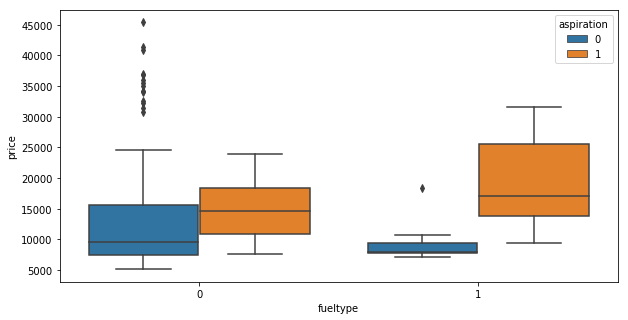

In [21]:
#Now checking fueltype with aspiration
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'fueltype', y = 'price', hue = 'aspiration', data = auto_temp)
plt.show()

#### *Inference: Above graphs depicts that in diesel catagory turbo engines are priced considerably high.*

### Data Preparation:

In [22]:
#From the above mentioned heatmap we are dropping collumns that are not relevant.
#Namely-symboling, carheight, stroke, compressionratio and peakrpm
auto_temp = auto_temp.drop(columns = ['symboling','carheight', 'stroke', 'compressionratio','peakrpm'])

In [23]:
auto_temp.shape

(205, 19)

In [24]:
auto_temp.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,citympg,price
0,alfa-romero,0,0,two,convertible,rwd,0,88.6,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111,21,13495.0
1,alfa-romero,0,0,two,convertible,rwd,0,88.6,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111,21,16500.0
2,alfa-romero,0,0,two,hatchback,rwd,0,94.5,171.2,65.5,2823,ohcv,six,152,mpfi,2.68,154,19,16500.0
3,audi,0,0,four,sedan,fwd,0,99.8,176.6,66.2,2337,ohc,four,109,mpfi,3.19,102,24,13950.0
4,audi,0,0,four,sedan,4wd,0,99.4,176.6,66.4,2824,ohc,five,136,mpfi,3.19,115,18,17450.0


In [25]:
#Now Converting some categoricallydescribednumbers to numerical datatype
auto_temp = auto_temp.replace({'doornumber':{'two':2, 'four':4}})
auto_temp = auto_temp.replace({'cylindernumber':{'two':2,'three':3,'four':4,'five':5,'six':6,'eight':8,
                                                'twelve':12}})
auto_temp.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,citympg,price
0,alfa-romero,0,0,2,convertible,rwd,0,88.6,168.8,64.1,2548,dohc,4,130,mpfi,3.47,111,21,13495.0
1,alfa-romero,0,0,2,convertible,rwd,0,88.6,168.8,64.1,2548,dohc,4,130,mpfi,3.47,111,21,16500.0
2,alfa-romero,0,0,2,hatchback,rwd,0,94.5,171.2,65.5,2823,ohcv,6,152,mpfi,2.68,154,19,16500.0
3,audi,0,0,4,sedan,fwd,0,99.8,176.6,66.2,2337,ohc,4,109,mpfi,3.19,102,24,13950.0
4,audi,0,0,4,sedan,4wd,0,99.4,176.6,66.4,2824,ohc,5,136,mpfi,3.19,115,18,17450.0


In [26]:
#Lets Do One Hot Encoding
car_body_encoded = pd.get_dummies(auto_temp['carbody'])
drivewheel_encoded = pd.get_dummies(auto_temp['drivewheel'])
enginetype_encoded = pd.get_dummies(auto_temp['enginetype'])
fuelsystem_encoded = pd.get_dummies(auto_temp['fuelsystem'])
Carname_encoded = pd.get_dummies(auto_temp['CarName'])

In [27]:
auto_temp = auto_temp.drop(columns = ['CarName','carbody','drivewheel','enginetype','fuelsystem'], axis = 1)
auto_temp.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,curbweight,cylindernumber,enginesize,boreratio,horsepower,citympg,price
0,0,0,2,0,88.6,168.8,64.1,2548,4,130,3.47,111,21,13495.0
1,0,0,2,0,88.6,168.8,64.1,2548,4,130,3.47,111,21,16500.0
2,0,0,2,0,94.5,171.2,65.5,2823,6,152,2.68,154,19,16500.0
3,0,0,4,0,99.8,176.6,66.2,2337,4,109,3.19,102,24,13950.0
4,0,0,4,0,99.4,176.6,66.4,2824,5,136,3.19,115,18,17450.0


In [28]:
auto_temp.columns

Index(['fueltype', 'aspiration', 'doornumber', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'curbweight', 'cylindernumber', 'enginesize',
       'boreratio', 'horsepower', 'citympg', 'price'],
      dtype='object')

In [29]:
auto_temp = auto_temp.reindex(columns=['price','fueltype', 'aspiration', 'doornumber', 'enginelocation', 
                                     'wheelbase','carlength', 'carwidth', 'curbweight', 'cylindernumber', 
                                     'enginesize','boreratio', 'horsepower', 'citympg'])
auto_temp.head()

,price,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,curbweight,cylindernumber,enginesize,boreratio,horsepower,citympg
0,13495.0,0,0,2,0,88.6,168.8,64.1,2548,4,130,3.47,111,21
1,16500.0,0,0,2,0,88.6,168.8,64.1,2548,4,130,3.47,111,21
2,16500.0,0,0,2,0,94.5,171.2,65.5,2823,6,152,2.68,154,19
3,13950.0,0,0,4,0,99.8,176.6,66.2,2337,4,109,3.19,102,24
4,17450.0,0,0,4,0,99.4,176.6,66.4,2824,5,136,3.19,115,18


In [30]:
auto_temp.shape

(205, 14)

In [31]:
#Now adding the Dummies:
auto_temp = pd.concat([auto_temp, car_body_encoded], axis = 1)
auto_temp.shape

(205, 19)

In [32]:
auto_temp = pd.concat([auto_temp, drivewheel_encoded], axis = 1)
auto_temp.shape

(205, 22)

In [33]:
auto_temp = pd.concat([auto_temp, enginetype_encoded], axis = 1)
auto_temp.shape

(205, 29)

In [34]:
auto_temp = pd.concat([auto_temp, fuelsystem_encoded], axis = 1)
auto_temp.shape

(205, 37)

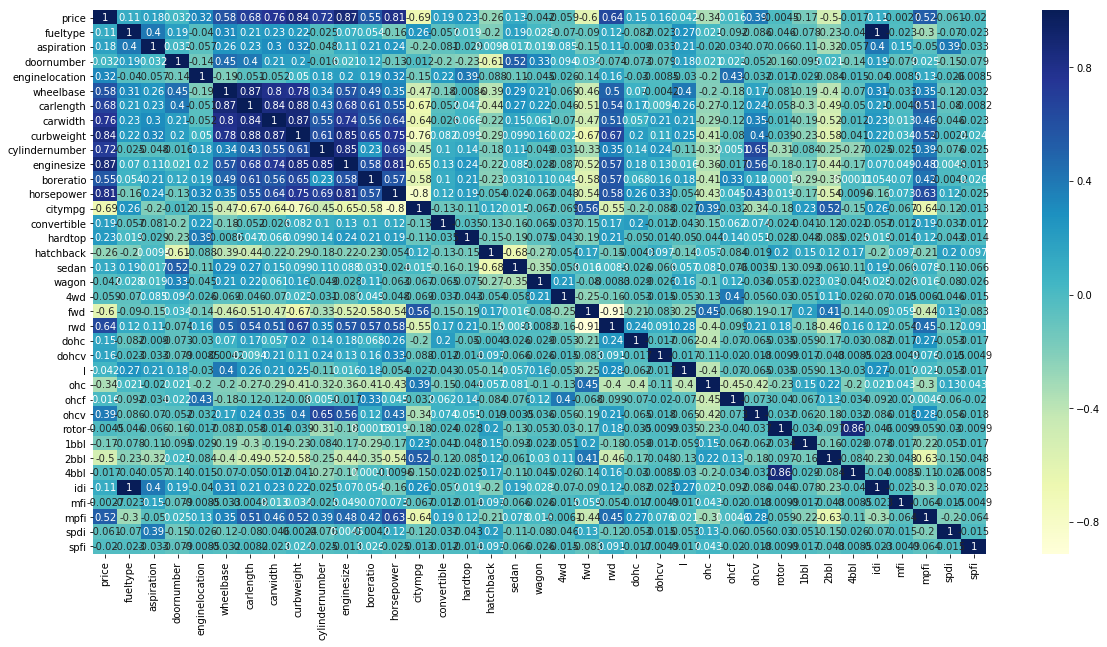

In [35]:
#StopPoint before adding CarName
#Creating Heatmap
plt.figure(figsize=(20,10))
sns.heatmap(auto_temp.corr(),annot=True, cmap='YlGnBu')

In [36]:
auto_temp = pd.concat([auto_temp, Carname_encoded], axis = 1)
auto_temp.shape

(205, 59)

In [37]:
#Lets Check their Datatypes now
auto_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 59 columns):
price             205 non-null float64
fueltype          205 non-null int64
aspiration        205 non-null int64
doornumber        205 non-null int64
enginelocation    205 non-null int64
wheelbase         205 non-null float64
carlength         205 non-null float64
carwidth          205 non-null float64
curbweight        205 non-null int64
cylindernumber    205 non-null int64
enginesize        205 non-null int64
boreratio         205 non-null float64
horsepower        205 non-null int64
citympg           205 non-null int64
convertible       205 non-null uint8
hardtop           205 non-null uint8
hatchback         205 non-null uint8
sedan             205 non-null uint8
wagon             205 non-null uint8
4wd               205 non-null uint8
fwd               205 non-null uint8
rwd               205 non-null uint8
dohc              205 non-null uint8
dohcv             205 non-null uin

In [38]:
#Converting all the columns into float type
auto_temp.iloc[:,:] = auto_temp.iloc[:,:].astype(float)
auto_temp.mean()

price             13276.710571
fueltype              0.097561
aspiration            0.180488
doornumber            3.121951
enginelocation        0.014634
wheelbase            98.756585
carlength           174.049268
carwidth             65.907805
curbweight         2555.565854
cylindernumber        4.380488
enginesize          126.907317
boreratio             3.329756
horsepower          104.117073
citympg              25.219512
convertible           0.029268
hardtop               0.039024
hatchback             0.341463
sedan                 0.468293
wagon                 0.121951
4wd                   0.043902
fwd                   0.585366
rwd                   0.370732
dohc                  0.058537
dohcv                 0.004878
l                     0.058537
ohc                   0.721951
ohcf                  0.073171
ohcv                  0.063415
rotor                 0.019512
1bbl                  0.053659
2bbl                  0.321951
4bbl                  0.014634
idi     

In [39]:
#Now Checking the model
from sklearn import linear_model
from sklearn.model_selection import train_test_split
y = auto_temp.iloc[:,0]
X = auto_temp.drop(['price'], axis = 1)
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3,random_state = 10)
regr = linear_model.LinearRegression().fit(X_train,y_train)

In [40]:
regr.intercept_

pred_train = regr.predict(X_train)

#regr.score(X_test,y_test)

from sklearn.metrics import mean_squared_error, r2_score

#mean_squared_error(y_test,predt)

r2_score(y_train,pred_train)

0.9582737241522935

In [41]:
regr.intercept_

predt = regr.predict(X_test)

regr.score(X_test,y_test)

from sklearn.metrics import mean_squared_error, r2_score

mean_squared_error(y_test,predt)

r2_score(y_test,predt)

0.8989909095962068

### CASE OF OVERFITTING 

In [42]:
#Hence using rfe to do feature selection
from sklearn.feature_selection import RFE
regr = linear_model.LinearRegression()
print(X.shape)
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state = 10)
print(X_train.shape)
regr = linear_model.LinearRegression().fit(X_train,y_train)
rfe = RFE(regr, 20)
rfe = rfe.fit(X_train, y_train)
#list(zip(X_train.columns, rfe.support_, rfe.ranking_))
col = X_train.columns[rfe.support_]
col

(205, 58)
(143, 58)


Index(['aspiration', 'enginelocation', 'cylindernumber', 'boreratio',
       'convertible', 'rotor', '4bbl', 'alfa-romero', 'bmw', 'buick', 'dodge',
       'honda', 'jaguar', 'mitsubishi', 'nissan', 'plymouth', 'porsche',
       'subaru', 'toyota', 'volkswagen'],
      dtype='object')

In [43]:
#Lets Check now by re-building the model:
auto_temp1 = auto_temp[['price','aspiration', 'enginelocation', 'carwidth', 'convertible', 'fwd',
       'dohc', 'l', 'ohc', 'ohcf', '4bbl', 'bmw', 'buick', 'isuzu', 'jaguar',
       'mitsubishi', 'peugeot', 'porsche', 'renault', 'saab', 'subaru']]
auto_temp1.head()

,price,aspiration,enginelocation,carwidth,convertible,fwd,dohc,l,ohc,ohcf,...,bmw,buick,isuzu,jaguar,mitsubishi,peugeot,porsche,renault,saab,subaru
0,13495.0,0.0,0.0,64.1,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,16500.0,0.0,0.0,64.1,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,16500.0,0.0,0.0,65.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,13950.0,0.0,0.0,66.2,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17450.0,0.0,0.0,66.4,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
y1 = auto_temp1.iloc[:,0]
X1 = auto_temp1.drop(['price'], axis = 1)
X_train,X_test,y_train,y_test = train_test_split(X1,y1, test_size=0.3, random_state = 10)
regr = linear_model.LinearRegression().fit(X_train,y_train)

In [45]:
regr.intercept_

pred_train = regr.predict(X_train)

#regr.score(X_test,y_test)

from sklearn.metrics import mean_squared_error, r2_score

#mean_squared_error(y_test,predt)

r2_score(y_train,pred_train)

0.926821637845334

In [46]:
regr.intercept_

predt = regr.predict(X_test)

regr.score(X_test,y_test)

from sklearn.metrics import mean_squared_error, r2_score

mean_squared_error(y_test,predt)

r2_score(y_test,predt)

0.9058503996346879

In [47]:
#Now Working on chosen 20 features 
auto_temp1.shape

(205, 21)

In [48]:
X_train.shape

(143, 20)

In [49]:
#Using Statsmodel:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const            -1.212515e+05
aspiration        1.063095e+03
enginelocation    1.094180e+04
carwidth          2.082397e+03
convertible       4.400589e+03
fwd              -1.859731e+03
dohc             -1.914527e+03
l                 2.693747e+03
ohc              -3.320456e+03
ohcf              3.169355e+03
4bbl             -1.916926e+03
bmw               1.314924e+04
buick             9.604694e+03
isuzu             2.826822e+03
jaguar            1.378125e+04
mitsubishi       -8.213976e+02
peugeot          -9.418313e+03
porsche           4.362299e+03
renault          -8.932600e-14
saab              2.352670e+03
subaru           -7.772448e+03
dtype: float64

In [50]:
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     87.25
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.03e-61
Time:                        02:48:25   Log-Likelihood:                -1299.8
No. Observations:                 143   AIC:                             2638.
Df Residuals:                     124   BIC:                             2694.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.213e+05   1.12e+04    -10.

In [51]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
19,subaru,inf
8,ohcf,inf
1,enginelocation,inf
2,carwidth,28.060000
7,ohc,24.840000
6,l,9.740000
15,peugeot,8.430000
4,fwd,5.210000
16,porsche,3.150000
5,dohc,2.910000


In [52]:
#Removing OHCF:
#Lets Check now by re-building the model: REMOVING OHCF
auto_temp2 = auto_temp[['price','aspiration', 'enginelocation', 'carwidth', 'convertible', 'fwd',
       'dohc', 'l', 'ohc', '4bbl', 'bmw', 'buick', 'isuzu', 'jaguar',
       'mitsubishi', 'peugeot', 'porsche', 'renault', 'saab', 'subaru']]
auto_temp2.head()

,price,aspiration,enginelocation,carwidth,convertible,fwd,dohc,l,ohc,4bbl,bmw,buick,isuzu,jaguar,mitsubishi,peugeot,porsche,renault,saab,subaru
0,13495.0,0.0,0.0,64.1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,16500.0,0.0,0.0,64.1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,16500.0,0.0,0.0,65.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,13950.0,0.0,0.0,66.2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17450.0,0.0,0.0,66.4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
y2 = auto_temp2.iloc[:,0]
X2 = auto_temp2.drop(['price'], axis = 1)
X_train,X_test,y_train,y_test = train_test_split(X2,y2, test_size=0.3, random_state = 10)

In [54]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.params

const            -1.212515e+05
aspiration        1.063095e+03
enginelocation    1.411116e+04
carwidth          2.082397e+03
convertible       4.400589e+03
fwd              -1.859731e+03
dohc             -1.914527e+03
l                 2.693747e+03
ohc              -3.320456e+03
4bbl             -1.916926e+03
bmw               1.314924e+04
buick             9.604694e+03
isuzu             2.826822e+03
jaguar            1.378125e+04
mitsubishi       -8.213976e+02
peugeot          -9.418313e+03
porsche           4.362299e+03
renault          -5.606028e-12
saab              2.352670e+03
subaru           -4.603093e+03
dtype: float64

In [55]:
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     87.25
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.03e-61
Time:                        02:48:42   Log-Likelihood:                -1299.8
No. Observations:                 143   AIC:                             2638.
Df Residuals:                     124   BIC:                             2694.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.213e+05   1.12e+04    -10.

In [56]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,carwidth,28.06
7,ohc,24.84
6,l,9.74
14,peugeot,8.43
4,fwd,5.21
1,enginelocation,3.62
15,porsche,3.15
18,subaru,3.09
5,dohc,2.91
10,buick,1.57


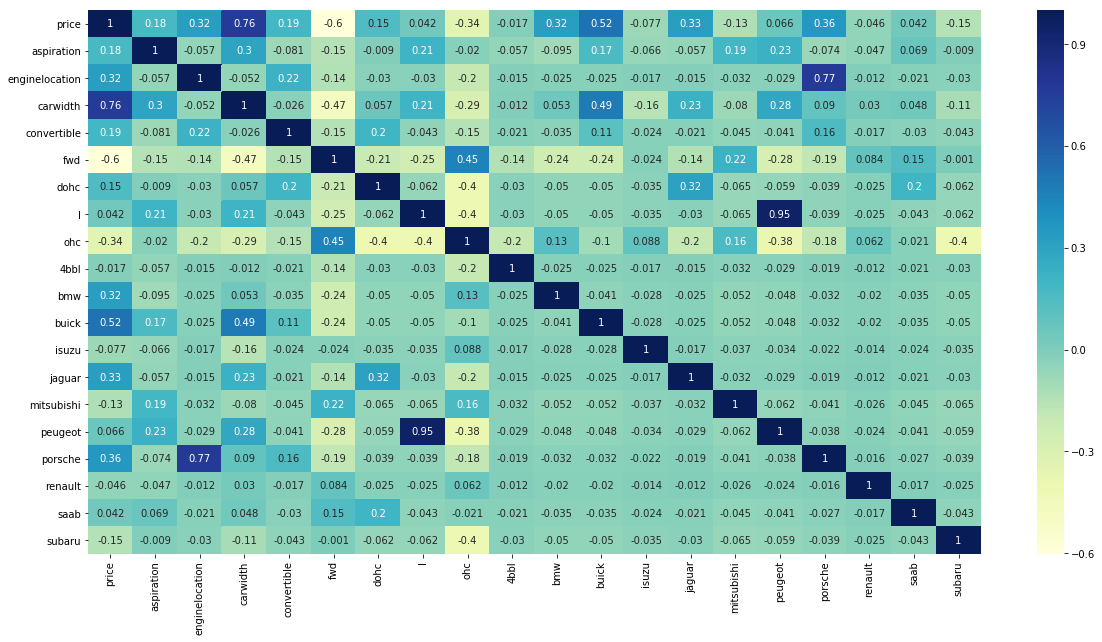

In [57]:
#Checking Correlation now:
#Creating Heatmap
plt.figure(figsize=(20,10))
sns.heatmap(auto_temp2.corr(),annot=True, cmap='YlGnBu')

In [58]:
#Removing I:
#Lets Check now by re-building the model: REMOVING I
auto_temp3 = auto_temp[['price','aspiration', 'enginelocation', 'carwidth', 'convertible', 'fwd',
       'dohc', 'ohc', '4bbl', 'bmw', 'buick', 'isuzu', 'jaguar',
       'mitsubishi', 'peugeot', 'porsche', 'renault', 'saab', 'subaru']]
#auto_temp3.head()
y3 = auto_temp3.iloc[:,0]
X3 = auto_temp3.drop(['price'], axis = 1)
X_train,X_test,y_train,y_test = train_test_split(X3,y3, test_size=0.3, random_state = 10)
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.params
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     92.37
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           3.29e-62
Time:                        02:48:50   Log-Likelihood:                -1300.3
No. Observations:                 143   AIC:                             2637.
Df Residuals:                     125   BIC:                             2690.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.168e+05   1.02e+04    -11.

In [59]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,carwidth,24.41
6,ohc,20.73
4,fwd,4.98
1,enginelocation,3.55
14,porsche,3.15
17,subaru,2.74
5,dohc,2.68
13,peugeot,2.29
9,buick,1.51
0,aspiration,1.36


In [60]:
#Removing OHC as it shows multi-collinearity
#Lets Check now by re-building the model: REMOVING OHC
auto_temp4 = auto_temp[['price','aspiration', 'enginelocation', 'carwidth', 'convertible', 'fwd',
       'dohc', '4bbl', 'bmw', 'buick', 'isuzu', 'jaguar',
       'mitsubishi', 'peugeot', 'porsche', 'renault', 'saab', 'subaru']]
#auto_temp3.head()
y4 = auto_temp4.iloc[:,0]
X4 = auto_temp4.drop(['price'], axis = 1)
X_train,X_test,y_train,y_test = train_test_split(X4,y4, test_size=0.3, random_state = 10)
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.params
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     88.06
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.64e-60
Time:                        02:48:55   Log-Likelihood:                -1308.0
No. Observations:                 143   AIC:                             2650.
Df Residuals:                     126   BIC:                             2700.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.241e+05   1.05e+04    -11.

In [61]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,carwidth,6.10
4,fwd,4.48
1,enginelocation,3.16
13,porsche,3.14
5,dohc,1.49
0,aspiration,1.35
7,bmw,1.31
12,peugeot,1.30
3,convertible,1.23
11,mitsubishi,1.23


In [62]:
#Removing RENAULT 
#Lets Check now by re-building the model: REMOVING RENAULT since very less coefficient hence doesn't contribute much
auto_temp5 = auto_temp[['price','aspiration', 'enginelocation', 'carwidth', 'convertible', 'fwd',
       'dohc', '4bbl', 'bmw', 'buick', 'isuzu', 'jaguar',
       'mitsubishi', 'peugeot', 'porsche', 'saab', 'subaru']]
#auto_temp3.head()
y5 = auto_temp5.iloc[:,0]
X5 = auto_temp5.drop(['price'], axis = 1)
X_train,X_test,y_train,y_test = train_test_split(X5,y5, test_size=0.3, random_state = 10)
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.params
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     88.06
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.64e-60
Time:                        02:48:58   Log-Likelihood:                -1308.0
No. Observations:                 143   AIC:                             2650.
Df Residuals:                     126   BIC:                             2700.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.241e+05   1.05e+04    -11.

In [63]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,carwidth,6.10
4,fwd,4.48
1,enginelocation,3.16
13,porsche,3.14
5,dohc,1.49
0,aspiration,1.35
7,bmw,1.31
12,peugeot,1.30
3,convertible,1.23
11,mitsubishi,1.23


In [64]:
#Removing 4BBL 
#Lets Check now by re-building the model: REMOVING 4BBH since it has high p value
auto_temp6 = auto_temp[['price','aspiration', 'enginelocation', 'carwidth', 'convertible', 'fwd',
       'dohc', 'bmw', 'buick', 'isuzu', 'jaguar',
       'mitsubishi', 'peugeot', 'porsche', 'saab', 'subaru']]
#auto_temp3.head()
y6 = auto_temp6.iloc[:,0]
X6 = auto_temp6.drop(['price'], axis = 1)
X_train,X_test,y_train,y_test = train_test_split(X6,y6, test_size=0.3, random_state = 10)
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.params
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     94.59
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.81e-61
Time:                        02:49:01   Log-Likelihood:                -1308.0
No. Observations:                 143   AIC:                             2648.
Df Residuals:                     127   BIC:                             2695.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -1.24e+05   1.04e+04    -11.

In [65]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,carwidth,5.85
4,fwd,4.35
1,enginelocation,3.16
12,porsche,3.13
5,dohc,1.49
0,aspiration,1.35
6,bmw,1.30
11,peugeot,1.29
3,convertible,1.23
10,mitsubishi,1.23


In [66]:
#Removing DOHC 
#Lets Check now by re-building the model: REMOVING DOHC since it has high p value
auto_temp7 = auto_temp[['price','aspiration', 'enginelocation', 'carwidth', 'convertible', 'fwd','bmw',
                        'buick', 'isuzu', 'jaguar','mitsubishi', 'peugeot', 'porsche', 'saab', 'subaru']]
#auto_temp3.head()
y7 = auto_temp7.iloc[:,0]
X7 = auto_temp7.drop(['price'], axis = 1)
X_train,X_test,y_train,y_test = train_test_split(X7,y7, test_size=0.3, random_state = 10)
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.params
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     101.4
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           4.28e-62
Time:                        02:49:05   Log-Likelihood:                -1308.5
No. Observations:                 143   AIC:                             2647.
Df Residuals:                     128   BIC:                             2692.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.231e+05   1.04e+04    -11.

In [67]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,carwidth,5.28
4,fwd,4.02
1,enginelocation,3.15
11,porsche,3.12
0,aspiration,1.35
5,bmw,1.27
10,peugeot,1.26
9,mitsubishi,1.23
3,convertible,1.20
6,buick,1.16


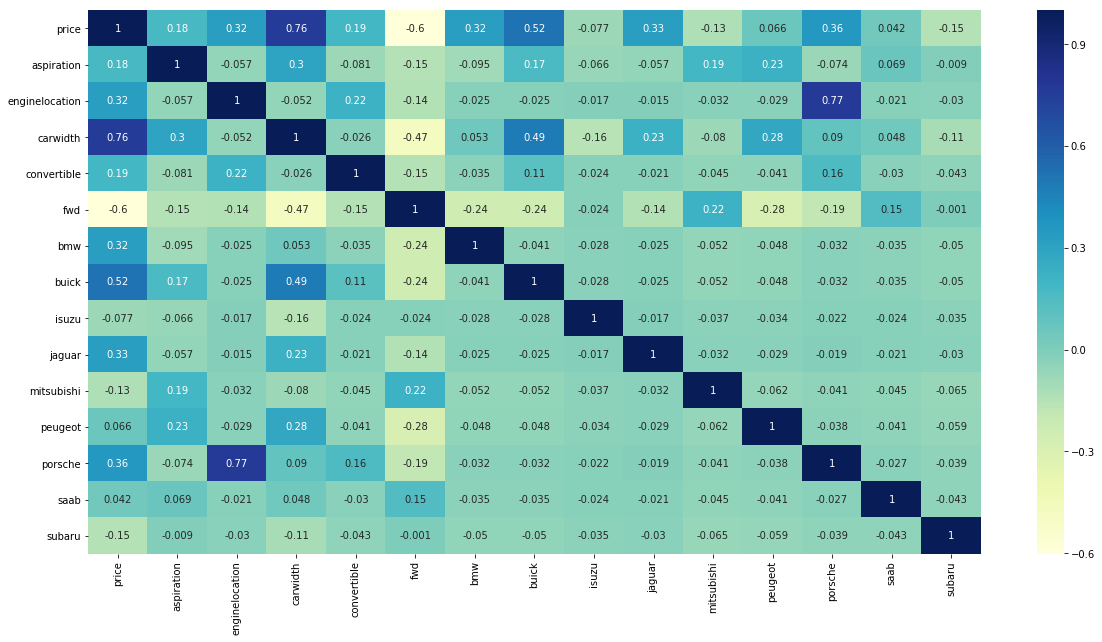

In [68]:
#Creating heatmap now
plt.figure(figsize=(20,10))
sns.heatmap(auto_temp7.corr(),annot=True, cmap='YlGnBu')

In [69]:
#Removing porsche as it shows multi-collinearity
#Lets Check now by re-building the model: REMOVING porsche 
auto_temp8 = auto_temp[['price','aspiration', 'enginelocation', 'carwidth', 'convertible', 'fwd','bmw',
                        'buick', 'isuzu', 'jaguar','mitsubishi', 'peugeot', 'saab', 'subaru']]
#auto_temp3.head()
y8 = auto_temp8.iloc[:,0]
X8 = auto_temp8.drop(['price'], axis = 1)
X_train,X_test,y_train,y_test = train_test_split(X8,y8, test_size=0.3, random_state = 10)
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.params
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     108.0
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.15e-62
Time:                        02:49:11   Log-Likelihood:                -1309.7
No. Observations:                 143   AIC:                             2647.
Df Residuals:                     129   BIC:                             2689.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.249e+05   1.04e+04    -12.

In [70]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,carwidth,5.08
4,fwd,3.92
0,aspiration,1.34
5,bmw,1.26
10,peugeot,1.25
9,mitsubishi,1.23
3,convertible,1.20
1,enginelocation,1.18
6,buick,1.15
12,subaru,1.12


In [71]:
#Removing fwd as it shows multi-collinearity
#Lets Check now by re-building the model: REMOVING fwd 
auto_temp9 = auto_temp[['price','aspiration', 'enginelocation', 'carwidth', 'convertible','bmw',
                        'buick', 'isuzu', 'jaguar','mitsubishi', 'peugeot', 'saab', 'subaru']]
#auto_temp3.head()
y9 = auto_temp9.iloc[:,0]
X9 = auto_temp9.drop(['price'], axis = 1)
X_train,X_test,y_train,y_test = train_test_split(X9,y9, test_size=0.3, random_state = 10)
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.params
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     100.6
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.17e-59
Time:                        02:49:16   Log-Likelihood:                -1320.1
No. Observations:                 143   AIC:                             2666.
Df Residuals:                     130   BIC:                             2705.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.468e+05   9796.915    -14.

In [72]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,carwidth,1.79
0,aspiration,1.33
3,convertible,1.18
8,mitsubishi,1.18
1,enginelocation,1.15
11,subaru,1.11
4,bmw,1.09
9,peugeot,1.09
10,saab,1.08
5,buick,1.06


In [73]:
#Removing saab as it shows high p value
#Lets Check now by re-building the model: REMOVING saab 
auto_temp10 = auto_temp[['price','aspiration', 'enginelocation', 'carwidth', 'convertible','bmw',
                        'buick', 'isuzu', 'jaguar','mitsubishi', 'peugeot', 'subaru']]
#auto_temp3.head()
y10 = auto_temp10.iloc[:,0]
X10 = auto_temp10.drop(['price'], axis = 1)
X_train,X_test,y_train,y_test = train_test_split(X10,y10, test_size=0.3, random_state = 10)
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.params
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     108.7
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.95e-60
Time:                        02:49:19   Log-Likelihood:                -1321.2
No. Observations:                 143   AIC:                             2666.
Df Residuals:                     131   BIC:                             2702.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.486e+05   9749.746    -15.

In [74]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,carwidth,1.71
0,aspiration,1.31
3,convertible,1.18
8,mitsubishi,1.16
1,enginelocation,1.15
10,subaru,1.10
4,bmw,1.09
9,peugeot,1.09
5,buick,1.05
6,isuzu,1.03


In [75]:
#Removing subaru as it shows high p value
#Lets Check now by re-building the model: REMOVING subaru 
auto_temp11 = auto_temp[['price','aspiration', 'enginelocation', 'carwidth', 'convertible','bmw',
                        'buick', 'isuzu', 'jaguar','mitsubishi', 'peugeot']]
#auto_temp3.head()
y11 = auto_temp11.iloc[:,0]
X11 = auto_temp11.drop(['price'], axis = 1)
X_train,X_test,y_train,y_test = train_test_split(X11,y11, test_size=0.3, random_state = 10)
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.params
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     118.0
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           8.88e-61
Time:                        02:49:25   Log-Likelihood:                -1322.5
No. Observations:                 143   AIC:                             2667.
Df Residuals:                     132   BIC:                             2700.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.502e+05   9750.285    -15.

In [76]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,carwidth,1.58
0,aspiration,1.31
3,convertible,1.17
1,enginelocation,1.15
8,mitsubishi,1.15
4,bmw,1.08
9,peugeot,1.08
5,buick,1.05
6,isuzu,1.03
7,jaguar,1.01


In [77]:
#Removing aspiration as it shows high p value
#Lets Check now by re-building the model: REMOVING aspiration 
auto_temp12 = auto_temp[['price', 'enginelocation', 'carwidth', 'convertible','bmw',
                        'buick', 'isuzu', 'jaguar','mitsubishi', 'peugeot']]
#auto_temp3.head()
y12 = auto_temp12.iloc[:,0]
X12 = auto_temp12.drop(['price'], axis = 1)
X_train,X_test,y_train,y_test = train_test_split(X12,y12, test_size=0.3, random_state = 10)
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.params
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     129.9
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.04e-61
Time:                        02:49:29   Log-Likelihood:                -1323.6
No. Observations:                 143   AIC:                             2667.
Df Residuals:                     133   BIC:                             2697.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.536e+05   9488.995    -16.

In [78]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,carwidth,1.37
2,convertible,1.17
0,enginelocation,1.15
7,mitsubishi,1.10
3,bmw,1.07
8,peugeot,1.07
4,buick,1.05
5,isuzu,1.03
6,jaguar,1.01


In [79]:
#Removing mitsubishi as it shows high p value
#Lets Check now by re-building the model: REMOVING mitsubishi 
auto_temp13 = auto_temp[['price', 'enginelocation', 'carwidth', 'convertible','bmw',
                        'buick', 'isuzu', 'jaguar', 'peugeot']]
#auto_temp3.head()
y13 = auto_temp13.iloc[:,0]
X13 = auto_temp13.drop(['price'], axis = 1)
X_train,X_test,y_train,y_test = train_test_split(X13,y13, test_size=0.3, random_state = 10)
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.params
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     144.1
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           5.87e-62
Time:                        02:49:32   Log-Likelihood:                -1325.0
No. Observations:                 143   AIC:                             2668.
Df Residuals:                     134   BIC:                             2695.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -1.54e+05   9542.214    -16.

In [80]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,carwidth,1.24
2,convertible,1.17
0,enginelocation,1.15
7,peugeot,1.07
3,bmw,1.06
4,buick,1.04
5,isuzu,1.02
6,jaguar,1.01


Text(0.5, 0, 'Errors')

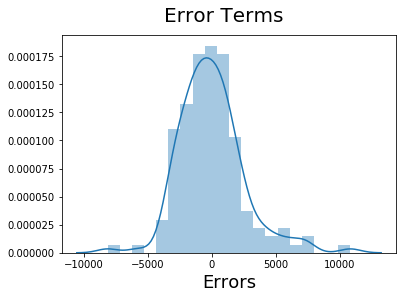

In [81]:
y_train_price = lr.predict(X_train_lm)
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

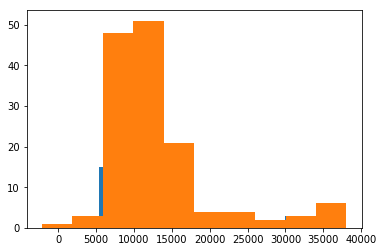

In [82]:
#Residuals Hist plot
import matplotlib.pyplot as plt
plt.hist(y_test)
plt.hist(y_train_price)
plt.show()

## Model Evaluation:
Let's now plot the graph for actual versus predicted values.

In [83]:
# Adding constant variable to test dataframe
X_test_final = sm.add_constant(X_test)
# Making predictions using the thirtheenth model
y_pred_final = lr.predict(X_test_final)

Text(0, 0.5, 'y_pred')

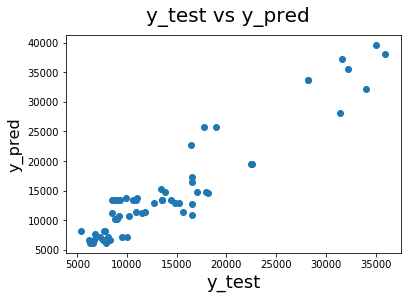

In [84]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred_final)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 

We can see that the equation of our best fitted line is:

$ price = 22410  \times  enginelocation + 2517.69  \times  carwidth + 5341.97 \times convertible + 1349 \times bmw + 10650 \times buick + 3547.53 \times isuzu + 14270 \times jaguar + -3490.45 \times peugeot $

# Overall, I believe I have got the best fitted model.
#### *Did not scale the data intensionally as i better understand the data with their original values and it does not affect the accuracy also*